In [25]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
print(df.shape)

(768, 9)


In [26]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [29]:
####  make model
## 1 step split the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# x = df.loc[:,df.columns != 'Outcome'] # X = df.drop('Outcome') # x = df.loc[:,0:8]
x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] ###how to use iloc
y = df.Outcome
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


In [30]:
mod=LogisticRegression()
mod.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
### score of training data
score = mod.score(x_train,y_train)
score

0.7736156351791531

In [32]:
### score of testing data
score = mod.score(x_test,y_test)
score

0.7662337662337663

In [33]:
mod.coef_

array([[ 1.38846062e-01,  2.82378517e-02, -1.67440700e-02,
        -5.09791340e-03, -3.73000958e-04,  4.91469020e-02,
         6.30798603e-01, -3.97059151e-03]])

<BarContainer object of 8 artists>

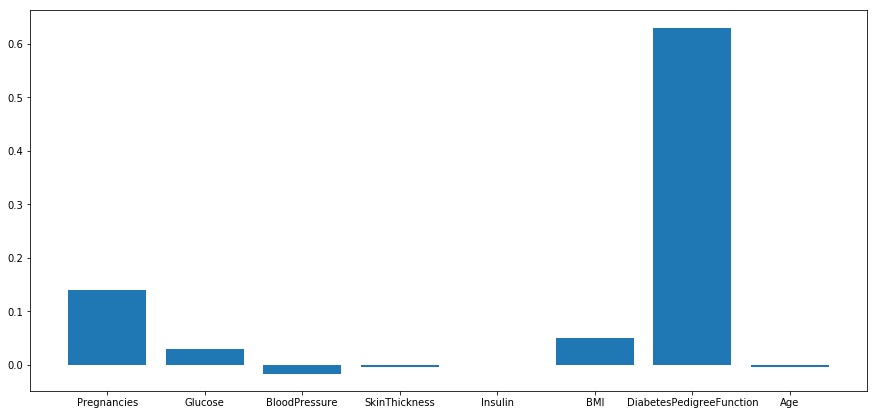

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize = [15,7])
plt.bar(list(df.columns[df.columns != 'Outcome']),mod.coef_[0])

In [52]:
#### scaling the training data 
### scaling can in increase the accuracy in some sense , because reduce the biase
### 不用所有x data 来fit scale 因为不能把test data提前给train了后面还需要test data 来test model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled=scaler.transform(x_train)
mod2=LogisticRegression()
mod2.fit(x_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
mod2.coef_

array([[ 0.48441128,  1.10245277, -0.22200015, -0.0662116 , -0.1142577 ,
         0.61108638,  0.30853685,  0.04279981]])

<BarContainer object of 8 artists>

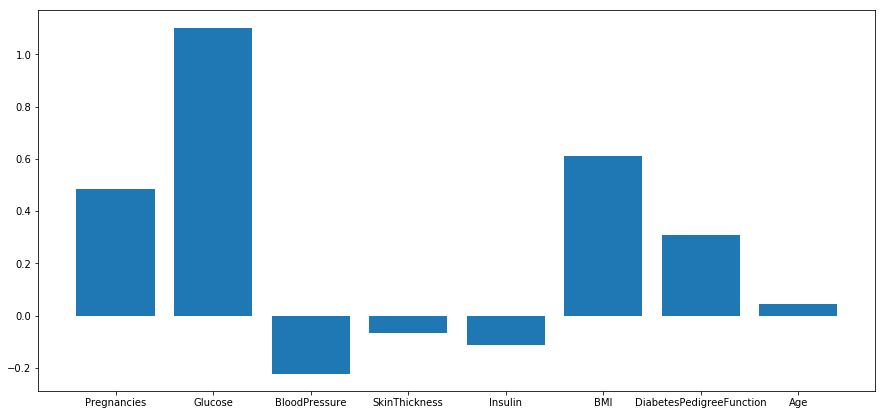

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize = [15,7])
plt.bar(list(df.columns[df.columns != 'Outcome']),mod2.coef_[0])

In [55]:
score1 = mod2.score(x_train_scaled,y_train)
score1

0.7866449511400652

In [56]:
x_test_scaled = scaler.transform(x_test)

In [57]:
score2 = mod2.score(x_test_scaled,y_test)
score2

0.7727272727272727

In [58]:
###
mod.predict(x_test_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
mod.predict_proba(x_test_scaled) #### the probability you get 0 and 1
### with probability we can pick some certain points

array([[0.99513342, 0.00486658],
       [0.97843786, 0.02156214],
       [0.99496766, 0.00503234],
       [0.9952267 , 0.0047733 ],
       [0.98886748, 0.01113252],
       [0.99299276, 0.00700724],
       [0.98717292, 0.01282708],
       [0.9945832 , 0.0054168 ],
       [0.9770304 , 0.0229696 ],
       [0.99618726, 0.00381274],
       [0.99713591, 0.00286409],
       [0.99610348, 0.00389652],
       [0.99039017, 0.00960983],
       [0.99676209, 0.00323791],
       [0.99481209, 0.00518791],
       [0.99619381, 0.00380619],
       [0.99452519, 0.00547481],
       [0.9907984 , 0.0092016 ],
       [0.99039857, 0.00960143],
       [0.99261909, 0.00738091],
       [0.99677103, 0.00322897],
       [0.98843923, 0.01156077],
       [0.99625511, 0.00374489],
       [0.99742623, 0.00257377],
       [0.99074695, 0.00925305],
       [0.99533527, 0.00466473],
       [0.99725482, 0.00274518],
       [0.99560013, 0.00439987],
       [0.99610288, 0.00389712],
       [0.99162811, 0.00837189],
       [0.